In [1]:
# 3일차 수업을 위한 추가 모듈 설치
!pip install torchinfo JAEN -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 983.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.0/397.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.

In [2]:
import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary

from JAEN.utils import train, evaluate, train_and_evaluate, plot_training_results

# 연산 장치 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 합성곱 신경망

In [3]:
# 데이터 변환 (이미지를 텐서로 변환하고 [0, 1] 범위로 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 이미지의 평균과 표준편차로 정규화
])

In [4]:
# 학습 및 테스트 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 26421880/26421880 [00:04<00:00, 6575876.39it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 173747.45it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3241419.69it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5310446.87it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [6]:
def conv2d_output_size(input_size, kernel_size, stride=1, padding=0):
    height, width = input_size

    # Convolution 공식 적용
    out_height = (height + 2 * padding - kernel_size) // stride + 1
    out_width = (width + 2 * padding - kernel_size) // stride + 1

    return out_height, out_width

In [7]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (26, 26)


In [8]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 1, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (28, 28)


In [9]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 0)
print(f"Output feature map size: {output_size}")

Output feature map size: (13, 13)


In [10]:
# 입력 크기 (Height, Width), 커널 크기, 스트라이드, 패딩
output_size = conv2d_output_size((28, 28), 3, 2, 1)
print(f"Output feature map size: {output_size}")

Output feature map size: (14, 14)


## 모델정의

In [15]:
# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        # (batch,1,28,28) channel 이 1인 이유는 흑백이라서
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1) #제로패딩넣음.
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2) #stride 2 주면 이미지 크기가 절반으로 줌
        self.fc1 = nn.Linear(32 * 7 * 7, 128) #conv > maxpool > conv maxpool > fully connected (fc)
                                              # 패딩해서 28 > 14 > 14 > 7
        self.fc2 = nn.Linear(128, 10)         # 출력층

    def forward(self, x):
        x = torch.relu(self.conv1(x)) #(B, 16, 28 , 28)
        x = self.maxpool(x)           #(B, 16, 14 , 14)
        x = torch.relu(self.conv2(x)) #(B, 32, 14 , 14)
        x = self.maxpool(x)           #(B, 32, 7 , 7)
        # 4차원 텐서를 2차원 텐서로 변경해야함.
        x = x.view(-1,32*7*7) # tensor를 재배치 하지만 원본을 남기고 하기때문에 데이터 복사가 이뤄지지 않음 약간 포인터 느낌. -1은 배치크기에 맞춰서란 뜻
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 요약 출력
model = CNN().to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─MaxPool2d: 1-2                         [64, 16, 14, 14]          --
├─Conv2d: 1-3                            [64, 32, 14, 14]          4,640
├─MaxPool2d: 1-4                         [64, 32, 7, 7]            --
├─Linear: 1-5                            [64, 128]                 200,832
├─Linear: 1-6                            [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (M): 79.17
Input size (MB): 0.20
Forward/backward pass size (MB): 9.70
Params size (MB): 0.83
Estimated Total Size (MB): 10.73

In [13]:
# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # 부모클래스 초기화
        # (batch, 1, 28, 28) Channel > 1 (흑백)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1) #zero 패딩
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(32 * 7 * 7, 128) # Conv > Max > Conv > Max > FC
                                              #  28    14     14     7
        self.fc2 = nn.Linear(128, 10)         # 출력층

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # (B, 16, 28, 28)
        x = self.pool(x)               # (B, 16, 14, 14)
        x = torch.relu(self.conv2(x))  # (B, 32, 14, 14)
        x = self.pool(x)               # (B, 32, 7, 7)

        # 4D Tensor > 2D Tensor
        x = x.view(-1, 32 * 7 * 7) # -1은 Batch 크기에 맞춰서 동작

        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 요약 출력
model = CNN().to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 28, 28]          160
├─MaxPool2d: 1-2                         [64, 16, 14, 14]          --
├─Conv2d: 1-3                            [64, 32, 14, 14]          4,640
├─MaxPool2d: 1-4                         [64, 32, 7, 7]            --
├─Linear: 1-5                            [64, 128]                 200,832
├─Linear: 1-6                            [64, 10]                  1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
Total mult-adds (M): 79.17
Input size (MB): 0.20
Forward/backward pass size (MB): 9.70
Params size (MB): 0.83
Estimated Total Size (MB): 10.73

In [14]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.7623, Train Accuracy: 75.66%
Test Loss: 0.5142, Test Accuracy: 81.51%
Epoch [2]
Train Loss: 0.4529, Train Accuracy: 83.80%
Test Loss: 0.4375, Test Accuracy: 84.11%
Epoch [3]
Train Loss: 0.4022, Train Accuracy: 85.90%
Test Loss: 0.4112, Test Accuracy: 84.86%
Epoch [4]
Train Loss: 0.3718, Train Accuracy: 86.79%
Test Loss: 0.3912, Test Accuracy: 85.69%
Epoch [5]
Train Loss: 0.3532, Train Accuracy: 87.41%
Test Loss: 0.3659, Test Accuracy: 86.87%
Epoch [6]
Train Loss: 0.3373, Train Accuracy: 88.08%
Test Loss: 0.3468, Test Accuracy: 87.67%
Epoch [7]
Train Loss: 0.3248, Train Accuracy: 88.43%
Test Loss: 0.3416, Test Accuracy: 87.43%
Epoch [8]
Train Loss: 0.3139, Train Accuracy: 89.00%
Test Loss: 0.3314, Test Accuracy: 87.77%
Epoch [9]
Train Loss: 0.3041, Train Accuracy: 89.14%
Test Loss: 0.3215, Test Accuracy: 88.43%
Epoch [10]
Train Loss: 0.2955, Train Accuracy: 89.57%
Test Loss: 0.3176, Test Accuracy: 88.67%


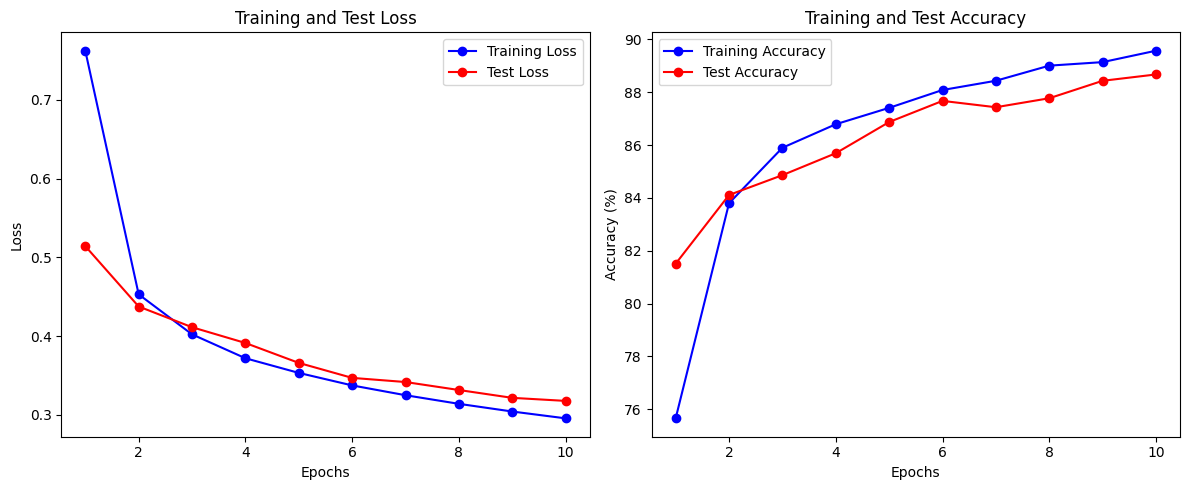

In [20]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 전이학습

In [21]:
# JAEN 패키지에서 CNN 모델 가져오기
from JAEN.models import CNNModel

# CNN 모델 불러오기 (pretrained=True)
model = CNNModel(pretrained=True)

# 모델 정보 확인
summary(model, (64, 1, 28, 28))

Pretrained weights loaded successfully on cuda.


/usr/local/lib/python3.10/dist-packages/JAEN/models.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location=device))


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          160
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          2,320
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          4,640
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          9,248
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --
│    

In [22]:
# 기존 Conv Block 동결
for param in model.conv_layers.parameters():
    param.requires_grad = False #미분가능한 텐서를 false를 줘서 미분 불가능하게 만들고 그렇다면 기울기를 못구해서 업데이트할 기울기가 없어서 학습이 안됨.

In [23]:
# 새로운 Fully Connected Block 설정
model.fc_layers = nn.Sequential(
    nn.Linear(32 * 7 * 7, 64),  # 첫 번째 은닉층
    nn.ReLU(),
    nn.Dropout(p=0.5),           # 드롭아웃 추가
    nn.Linear(64, 10)           # 출력층 (활성화 함수 없음)
)

# 디바이스 설정 (GPU 또는 CPU)
model = model.to(device)
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          (160)
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          (2,320)
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          (4,640)
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          (9,248)
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  

In [ ]:
# 손실 함수와 최적화 도구 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.8642, Train Accuracy: 72.46%
Test Loss: 0.5218, Test Accuracy: 82.39%
Epoch [2]
Train Loss: 0.5486, Train Accuracy: 81.45%
Test Loss: 0.4504, Test Accuracy: 84.61%
Epoch [3]
Train Loss: 0.4832, Train Accuracy: 83.75%
Test Loss: 0.4170, Test Accuracy: 85.67%
Epoch [4]
Train Loss: 0.4468, Train Accuracy: 84.83%
Test Loss: 0.3959, Test Accuracy: 86.23%
Epoch [5]
Train Loss: 0.4207, Train Accuracy: 85.81%
Test Loss: 0.3806, Test Accuracy: 86.71%
Epoch [6]
Train Loss: 0.3993, Train Accuracy: 86.42%
Test Loss: 0.3705, Test Accuracy: 87.03%
Epoch [7]
Train Loss: 0.3848, Train Accuracy: 86.84%
Test Loss: 0.3620, Test Accuracy: 87.42%
Epoch [8]
Train Loss: 0.3755, Train Accuracy: 87.05%
Test Loss: 0.3551, Test Accuracy: 87.45%
Epoch [9]
Train Loss: 0.3651, Train Accuracy: 87.42%
Test Loss: 0.3504, Test Accuracy: 87.61%
Epoch [10]
Train Loss: 0.3559, Train Accuracy: 87.70%
Test Loss: 0.3435, Test Accuracy: 87.78%


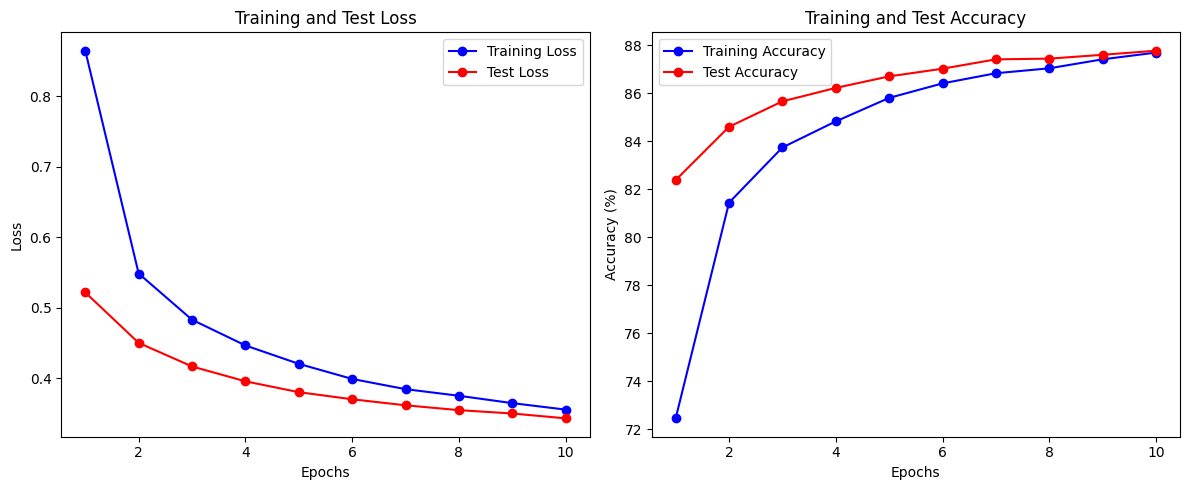

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 미세조정

In [ ]:
# JAEN 패키지에서 CNN 모델 가져오기
from JAEN.models import CNNModel

# CNN 모델 불러오기 (pretrained=True)
model = CNNModel(pretrained=True)

# 모델 정보 확인
summary(model, (64, 1, 28, 28))

Pretrained weights loaded successfully on cuda.


/usr/local/lib/python3.10/dist-packages/JAEN/models.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location=device))


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          160
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          2,320
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          4,640
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          9,248
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --
│    

In [24]:
# 기존 Conv Block 동결
for param in model.conv_layers.parameters():
    param.requires_grad = False

In [26]:
# 새로운 Fully Connected Block 설정
model.fc_layers = nn.Sequential(
    nn.Linear(32 * 7 * 7, 64),  # 첫 번째 은닉층
    nn.ReLU(),
    nn.Dropout(p=0.5),           # 드롭아웃 추가
    nn.Linear(64, 10)           # 출력층 (활성화 함수 없음)
)

# 디바이스 설정 (GPU 또는 CPU)
model = model.to(device)

In [27]:
# 손실 함수와 최적화 도구 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)  #p를 입력으로 받아서 미분이 가능한거라면 학습시키겠다는 내용

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.8891, Train Accuracy: 72.02%
Test Loss: 0.5258, Test Accuracy: 82.32%
Epoch [2]
Train Loss: 0.5551, Train Accuracy: 81.47%
Test Loss: 0.4528, Test Accuracy: 84.48%
Epoch [3]
Train Loss: 0.4860, Train Accuracy: 83.72%
Test Loss: 0.4163, Test Accuracy: 85.62%
Epoch [4]
Train Loss: 0.4478, Train Accuracy: 84.82%
Test Loss: 0.3967, Test Accuracy: 86.10%
Epoch [5]
Train Loss: 0.4221, Train Accuracy: 85.67%
Test Loss: 0.3826, Test Accuracy: 86.64%
Epoch [6]
Train Loss: 0.4041, Train Accuracy: 86.25%
Test Loss: 0.3702, Test Accuracy: 87.02%
Epoch [7]
Train Loss: 0.3885, Train Accuracy: 86.80%
Test Loss: 0.3616, Test Accuracy: 87.16%
Epoch [8]
Train Loss: 0.3747, Train Accuracy: 87.10%
Test Loss: 0.3549, Test Accuracy: 87.40%
Epoch [9]
Train Loss: 0.3621, Train Accuracy: 87.44%
Test Loss: 0.3498, Test Accuracy: 87.63%
Epoch [10]
Train Loss: 0.3558, Train Accuracy: 87.64%
Test Loss: 0.3441, Test Accuracy: 87.88%


In [28]:
# 마지막 두 Conv 레이어만 학습하도록 설정
for name, param in model.conv_layers.named_parameters():
    if name in ['5.weight', '5.bias', '6.weight', '6.bias']:
        param.requires_grad = True

In [29]:
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 7, 7]            --
│    └─Conv2d: 2-1                       [64, 16, 28, 28]          (160)
│    └─ReLU: 2-2                         [64, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [64, 16, 28, 28]          (2,320)
│    └─ReLU: 2-4                         [64, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [64, 16, 14, 14]          --
│    └─Conv2d: 2-6                       [64, 32, 14, 14]          4,640
│    └─ReLU: 2-7                         [64, 32, 14, 14]          --
│    └─Conv2d: 2-8                       [64, 32, 14, 14]          (9,248)
│    └─ReLU: 2-9                         [64, 32, 14, 14]          --
│    └─MaxPool2d: 2-10                   [64, 32, 7, 7]            --
├─Sequential: 1-2                        [64, 10]                  --

In [30]:
# 손실 함수와 최적화 도구 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.3425, Train Accuracy: 88.04%
Test Loss: 0.3320, Test Accuracy: 88.07%
Epoch [2]
Train Loss: 0.3295, Train Accuracy: 88.41%
Test Loss: 0.3267, Test Accuracy: 88.32%
Epoch [3]
Train Loss: 0.3206, Train Accuracy: 88.74%
Test Loss: 0.3209, Test Accuracy: 88.53%
Epoch [4]
Train Loss: 0.3105, Train Accuracy: 89.00%
Test Loss: 0.3160, Test Accuracy: 88.84%
Epoch [5]
Train Loss: 0.3054, Train Accuracy: 89.22%
Test Loss: 0.3115, Test Accuracy: 88.82%
Epoch [6]
Train Loss: 0.2957, Train Accuracy: 89.69%
Test Loss: 0.3090, Test Accuracy: 88.79%
Epoch [7]
Train Loss: 0.2941, Train Accuracy: 89.66%
Test Loss: 0.3045, Test Accuracy: 89.08%
Epoch [8]
Train Loss: 0.2871, Train Accuracy: 89.76%
Test Loss: 0.3026, Test Accuracy: 89.12%
Epoch [9]
Train Loss: 0.2789, Train Accuracy: 90.06%
Test Loss: 0.3024, Test Accuracy: 89.09%
Epoch [10]
Train Loss: 0.2735, Train Accuracy: 90.23%
Test Loss: 0.3016, Test Accuracy: 89.16%


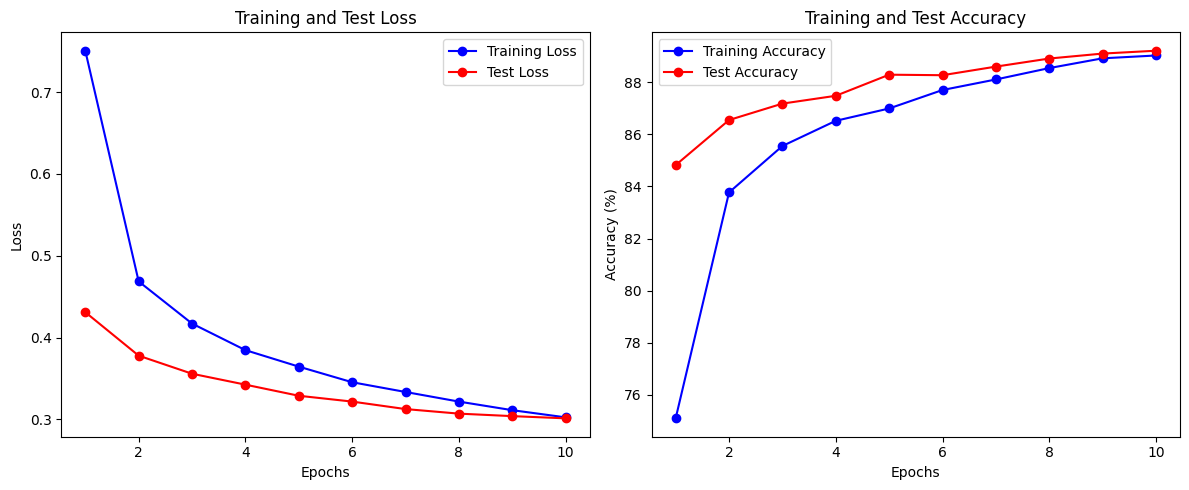

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 텍스트 데이터 처리 실습 – 토큰화

In [10]:
# 허깅페이스 오토 토크나이저 생성
from transformers import AutoTokenizer

model = "bert-base-cased"
sktmodel = "skt/kogpt2-base-v2"
skttokenizer = AutoTokenizer.from_pretrained(sktmodel)
tokenizer = AutoTokenizer.from_pretrained(model) #bert모델의 tokenizer

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
# 텍스트 정수화
text = "AI Essential"
tokenizer(text) #첫번째는 시작토큰 끝은 종료토큰 중간에 내용물

{'input_ids': [101, 19016, 26768, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [14]:
skttext = "안녕 바나나"
skttokenizer(skttext)
skttoken = skttokenizer.tokenize(skttext)
skttoken

['▁안녕', '▁바나나']

In [6]:
# 텍스트 토튼화
text = "AI Essential"
tokens = tokenizer.tokenize(text)
tokens

['AI', 'Essential']

In [7]:
# 토큰 정수화
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

[19016, 26768]

In [8]:
# 정수 디코딩
tokenizer.decode(ids)

'AI Essential'

# 텍스트 데이터 처리 실습 - 임베딩

In [17]:
import torch
import torch.nn as nn

# 임베딩 모듈 생성 (정수 인덱스 10개, 각 인덱스는 5차원의 벡터로 매핑) #순환모델인 RNN에서는 3차원 텐서를 받아야한다.
embedding_layer = nn.Embedding(num_embeddings=50000, embedding_dim=32)  #num_embeddings는 단어갯수 그리고 embedding_dim 이거는 몇개로 내보낼지

# 임베딩에 사용할 예시 입력 데이터 (정수 인덱스)
# 여기서 [2, 5, 7]은 단어나 토큰에 해당한다고 가정
input_data = torch.tensor(ids)

# 임베딩 레이어에 입력 데이터를 전달하여 벡터 변환
embedded_output = embedding_layer(input_data)

print("입력 데이터 (정수 인덱스):", input_data)
print("임베딩 결과 (벡터):\n", embedded_output)

입력 데이터 (정수 인덱스): tensor([19016, 26768])
임베딩 결과 (벡터):
 tensor([[-7.1921e-01, -3.2144e-01, -1.0775e+00,  2.0678e-01,  9.7482e-01,
         -1.6533e+00, -4.0149e-02,  2.3012e-01,  2.9486e+00,  5.0614e-01,
         -1.0196e+00,  2.3553e-01,  6.5146e-01, -3.0745e-02, -2.8529e-01,
         -1.8420e+00, -2.7915e-01, -1.2453e+00,  1.7664e+00,  1.1897e+00,
          1.7993e-01,  1.7432e-01,  1.2432e+00,  1.7271e+00, -9.0316e-02,
         -3.6025e-01,  1.0884e+00,  2.0074e-01, -8.5329e-01, -7.6820e-01,
          9.7093e-01,  1.3362e+00],
        [ 7.1219e-01, -3.1371e-01, -9.7246e-01, -6.6477e-01,  6.5611e-01,
          8.9932e-01,  8.7269e-01,  9.8910e-01,  6.0559e-01,  5.3442e-01,
          6.1477e-01,  2.0345e+00,  1.0035e+00, -1.0015e+00,  1.4516e-01,
          4.3235e-01,  1.5699e-01, -3.5990e-02,  3.9417e-01,  2.3295e-01,
          4.9999e-01,  5.2496e-01,  5.1443e-01,  1.3318e+00, -1.6426e-01,
         -1.7936e-01, -1.7955e+00, -1.0340e+00,  1.3687e+00, -1.8781e-03,
          2.1794e+00, 

# RNN Text Lab

# 기본 모듈 import

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchinfo import summary

# 연산 장치 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 글자 예측 (단어 완성, Character Level)
 - 단어의 마지막 글자 예측

## 글자 사전 생성

In [24]:
# 학습할 단어 목록
words = ['actor', 'angel', 'april', 'bacon', 'birth', 'black', 'cacao', 'child', 'count', 'drink']

# 글자 사전 생성 함수
def build_vocab(data):
    tokens = []
    for word in data:
        tokens.extend(list(word))

    result = {}
    for index, char in enumerate(set(tokens)):
      result[char] = index
    # {k:v for v,k in enumerate(set(tokens))}
    return result


vocab = build_vocab(words)
vocab

{'l': 0,
 't': 1,
 'h': 2,
 'p': 3,
 'o': 4,
 'k': 5,
 'n': 6,
 'd': 7,
 'i': 8,
 'u': 9,
 'g': 10,
 'b': 11,
 'a': 12,
 'e': 13,
 'r': 14,
 'c': 15}

In [25]:
# 글자 목록 확인
vocab.keys()

dict_keys(['l', 't', 'h', 'p', 'o', 'k', 'n', 'd', 'i', 'u', 'g', 'b', 'a', 'e', 'r', 'c'])

In [26]:
# 정수 -> 글자 사전 생성 (역변환용)
i2c = {v:k for k,v in vocab.items()}
i2c

{0: 'l',
 1: 't',
 2: 'h',
 3: 'p',
 4: 'o',
 5: 'k',
 6: 'n',
 7: 'd',
 8: 'i',
 9: 'u',
 10: 'g',
 11: 'b',
 12: 'a',
 13: 'e',
 14: 'r',
 15: 'c'}

## 글자 Tokenize(Sequence 변환)

In [31]:
# 단어를 글자로 토큰화
# seqs = [[vocab[w] for w in word] for word in words]
seqs = []
for word in words:
    result =[]
    for char in word:
        result.append(vocab[char])
    seqs.append(result)
seqs

[[12, 15, 1, 4, 14],
 [12, 6, 10, 13, 0],
 [12, 3, 14, 8, 0],
 [11, 12, 15, 4, 6],
 [11, 8, 14, 1, 2],
 [11, 0, 12, 15, 5],
 [15, 12, 15, 12, 4],
 [15, 2, 8, 0, 7],
 [15, 4, 9, 6, 1],
 [7, 14, 8, 6, 5]]

## 벡터화 (Vectorize)

In [33]:
# 텐서로 변환
x = torch.tensor(seqs)[:,:-1].to(device)
y = torch.tensor(seqs)[:,-1].to(device)
x, y

# x(토큰화된 단어 데이터)를 원핫 벡터화 임베딩 없이 원핫 인코딩 단어가 위치하는 자리값에 대하여 나오면 1 아니면 0 잘안쓰임. 아에 임베딩 레이어를 씀.
x_vec = F.one_hot(x).to(torch.float32)
x_vec[:1], x_vec.shape, y.shape

(tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]],
        device='cuda:0'),
 torch.Size([10, 4, 16]),
 torch.Size([10]))

## 모델 구성 및 생성

In [34]:
# 모델 구성
class NextChar(nn.Module):
    def __init__(self,vocab_size,hidden_size,output_size):
        super().__init__()
        self.rnn = nn.RNN(vocab_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size) #출력층


    def forward(self, x):
        out, _ = self.rnn(x) # _ 는 마지막 은닉상태 (hidden state)
        # rnn cell 은 3d tensor ( 배치, 스퀀스길이, 출력차원)
        out = self.fc(out[:,-1,:]) # 3d텐서를 2d텐서로 바꿔주는 코드
        #출력은 마지막 시퀀스만 사용 왜냐하면 마지막 한글자를 예측하는 모델임으로 그래서 -1
        return out


In [35]:
torch.manual_seed(0)
# 모델 인스턴스 생성
# 히든 128
model = NextChar(len(vocab), 128, len(vocab)).to(device)

# 출력 테스트
output = model(x_vec)
output.shape

torch.Size([10, 16])

## 모델 학습

In [36]:
loss_fn = nn.CrossEntropyLoss() # 손실 함수
optimizer = optim.Adam(model.parameters()) # 최적화 도구(optimizer)

epochs = 1000 # 최대 에폭 지정
results = {'cost':[]}

model.train() # 학습 모드 설정

for epoch in range(epochs):
    h = model(x_vec) # 예측 값 생성(추론)
    loss = loss_fn(h, y) # 손실 계산

    optimizer.zero_grad() # 미분 값 초기화
    loss.backward() # 역전파(미분 계산)
    optimizer.step() # 업데이트 진행

    results['cost'].append(loss.item())

    if epoch%100 == 0:
        print(f'epoch: {epoch:3d}, cost: {results["cost"][-1]:.10f}')

epoch:   0, cost: 2.8058135509
epoch: 100, cost: 0.0148508670
epoch: 200, cost: 0.0041029477
epoch: 300, cost: 0.0020735492
epoch: 400, cost: 0.0012758754
epoch: 500, cost: 0.0008729645
epoch: 600, cost: 0.0006384210
epoch: 700, cost: 0.0004887850
epoch: 800, cost: 0.0003869805
epoch: 900, cost: 0.0003142306


## 예측 값 생성(추론)

In [37]:
pred = model(x_vec) # 예측 값 생성 (벡터 값)
# 벡터 값을 정수로 변환
pred = torch.argmax(pred, dim=1).detach().cpu().numpy()

print(f'원본 데이터: {words}')
print(f'입력 데이터: {["".join([i2c[int(i)] for i in x_seq]) for x_seq in x]}')
print(f'예측한 글자: {[i2c[i] for i in pred]}')

원본 데이터: ['actor', 'angel', 'april', 'bacon', 'birth', 'black', 'cacao', 'child', 'count', 'drink']
입력 데이터: ['acto', 'ange', 'apri', 'baco', 'birt', 'blac', 'caca', 'chil', 'coun', 'drin']
예측한 글자: ['r', 'l', 'l', 'n', 'h', 'k', 'o', 'd', 't', 'k']


---

# 긍정/부정 분류(Many to One)

## 학습용 데이터 구성

In [38]:
corpus = [
    'very good nice quality',
    'stop lying',
    'ugly terrible',
    'excellent work',
    'adorable lovely',
    'bad',
    'great nice'
]
y = torch.FloatTensor([1, 0, 0, 1, 1, 0, 1]).view(-1, 1) # 0: 부정, 1: 긍정

## 토크나이저 생성 및 토큰화

In [39]:
# 사전학습된 토크나이저 불러오기
from transformers import AutoTokenizer

model = 'gmteacher/simple-word-tokenizer'
tokenizer = AutoTokenizer.from_pretrained(model,clean_up_tokenization_spaces=True) #clean up option은 bert모델 사용할때만 사용하는 옵션
seqs = tokenizer(corpus)['input_ids']
seqs # 변환된 시퀀스

tokenizer_config.json:   0%|          | 0.00/370 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/763 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

[[12, 4, 0, 8], [9, 7], [11, 10], [3, 13], [1, 6], [2], [5, 0]]

In [41]:
# 시퀀스를 단어로 복원
[tokenizer.decode(seq) for seq in seqs]

['very good nice quality',
 'stop lying',
 'ugly terrible',
 'excellent work',
 'adorable lovely',
 'bad',
 'great nice']

## 패딩(Padding)

In [42]:
from torch.nn.utils.rnn import pad_sequence #가장 긴 시퀀스 very good nice quality 총 4개로 맞춰주고 0 padding해준다.

# 각 시퀀스를 텐서로 변환
seqs = [torch.tensor(seq) for seq in seqs]
#토크나이져에서 0를 제로배딩의 제로와 혼돈되기때문에 사용하면 안된다.
# 시퀀스를 패딩
x = pad_sequence(seqs, batch_first=True)
x

tensor([[12,  4,  0,  8],
        [ 9,  7,  0,  0],
        [11, 10,  0,  0],
        [ 3, 13,  0,  0],
        [ 1,  6,  0,  0],
        [ 2,  0,  0,  0],
        [ 5,  0,  0,  0]])

## 모델 구성 및 생성

In [43]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, seq_len, num_class):
        super().__init__()
        # 임베딩 계층 추가
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.flat = nn.Flatten()
        self.fc = nn.Linear(seq_len*embed_dim, num_class)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.embedding(x)
        out = self.flat(out)
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

In [44]:
torch.manual_seed(0)
# 모델 인스턴스 생성
model = TextClassifier(tokenizer.vocab_size, 2, x.shape[1], 1).to(device)

# 출력 테스트
output = model(x[:1].to(device))
output.shape

torch.Size([1, 1])

In [45]:
# 장치 적용
x = x.to(device)
y = y.to(device)

In [46]:
loss_fn = nn.BCELoss() # 손실 함수
optimizer = optim.Adam(model.parameters()) # 최적화 도구(optimizer)

epochs = 5000 # 최대 에폭 지정
results = {'cost':[]}

model.train() # 학습 모드 설정

for epoch in range(epochs):
    h = model(x) # 예측 값 생성(추론)
    loss = loss_fn(h, y) # 손실 계산

    optimizer.zero_grad() # 미분 값 초기화
    loss.backward() # 역전파(미분 계산)
    optimizer.step() # 업데이트 진행

    results['cost'].append(loss.item())

    if epoch%1000 == 0:
        print(f'epoch: {epoch:4d}, cost: {results["cost"][-1]:.10f}')

epoch:    0, cost: 0.7253667116
epoch: 1000, cost: 0.0511420816
epoch: 2000, cost: 0.0059207636
epoch: 3000, cost: 0.0018174575
epoch: 4000, cost: 0.0007528989


In [47]:
# 예측 값(시그모이드 값)을 클래스로 변환
pred = (h.view(-1).detach().cpu() > 0.5).to(torch.float32)

print(f'실제 값: {y.view(-1)}')
print(f'예측 값: {pred}')

실제 값: tensor([1., 0., 0., 1., 1., 0., 1.], device='cuda:0')
예측 값: tensor([1., 0., 0., 1., 1., 0., 1.])


## 임베딩 계층 시각화

In [48]:
# 학습에 사용된 단어의 id 목록화
x.unique()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       device='cuda:0')

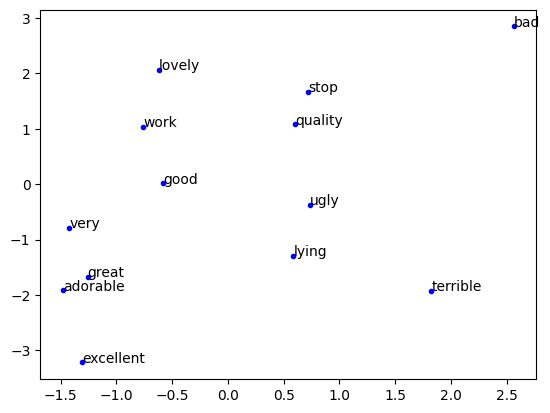

In [49]:
weights = model.embedding.weight.detach().cpu().numpy()
unique_ids = x.unique().cpu().numpy()

for idx, (d1, d2) in enumerate(weights[unique_ids]):
    if idx == 0:
        continue
    plt.plot(d1, d2, 'b.')
    plt.annotate(tokenizer.decode(unique_ids[idx]), (d1, d2))

# 한국어-영어 번역기

## 한-영 말뭉치 준비

In [ ]:
import os
import zipfile
from urllib import request

os.makedirs('data', exist_ok=True)

file_path = 'data/kor_eng.zip'
url = 'http://www.manythings.org/anki/kor-eng.zip'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
req = request.Request(url, headers=headers)

with request.urlopen(req) as r:
  with open(file_path, 'wb') as f:
    f.write(r.read())

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
# 한-영 말뭉치 읽기
import csv

with open('data/kor.txt', encoding='utf-8') as file:
    rdr = csv.reader(file, delimiter='\t')
    data = [line[:-1] for line in rdr]

In [ ]:
# 말뭉치 출력


[['Go.', '가.'],
 ['Hi.', '안녕.'],
 ['Run!', '뛰어!'],
 ['Run.', '뛰어.'],
 ['Who?', '누구?']]

In [ ]:
# 데이터 샘플링
# 전체 데이터 중에 3000개만 사용
data =

In [ ]:
# 한-영 데이터 분리
english =
korean =
english[:5], korean[:5]

(['Go.', 'Hi.', 'Run!', 'Run.', 'Who?'], ['가.', '안녕.', '뛰어!', '뛰어.', '누구?'])

In [ ]:
# 텍스트 클리닝
# 문자, 숫자, 일부 기호만 남기고 제거하기
import re

print('제거 전:', korean[1999], english[1999])
english =
korean =
print('제거 후:', korean[1999], english[1999])

제거 전: 그들은 당신을 지켜보고 있다. They're watching you.
제거 후: 그들은 당신을 지켜보고 있다  They re watching you 


In [ ]:
# 영어 토크나이저 생성
from transformers import AutoTokenizer

model = 'gmteacher/simple-word-tokenizer-english'
eng_tokenizer =

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/79.1k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [ ]:
# 한국어 토크나이저 생성
from transformers import AutoTokenizer

model = 'gmteacher/simple-word-tokenizer-korean'
kor_tokenizer =

tokenizer_config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/209k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [ ]:
# 데이터 토큰화
import torch

kor_tokens =
eng_bos_tokens =
eng_eos_tokens =

In [ ]:
# 토큰화(정수화)된 시퀀스를 문장으로 복원
print(kor_tokenizer.decode(kor_tokens[0]))
print(eng_tokenizer.decode(eng_bos_tokens[0]))
print(eng_tokenizer.decode(eng_eos_tokens[0]))

가
<bos> go
go <eos>


## 패딩 (Padding)

In [ ]:
# 최대 길이 확인
max_x_enc =
max_x_dec =
max_y_dec =
print('spa x max len:', max_x_enc)
print('eng x max len:', max_x_dec)
print('eng y max len:', max_y_dec)

spa x max len: 9
eng x max len: 9
eng y max len: 9


In [ ]:
# 커스텀 패딩 함수
from torch.nn.utils.rnn import pad_sequence

def custom_padding(sequences, maxlen=None, padding='pre', truncating='pre', pad=0.0):
    if maxlen is not None:
        sequences.append(torch.LongTensor([pad]*maxlen))

    if padding == 'post':
        result = pad_sequence(sequences, batch_first=True, padding_value=pad)
    elif padding == 'pre':
        result = [seq.flip(-1) for seq in sequences]
        result = pad_sequence(result, batch_first=True, padding_value=pad).flip(-1)
    else:
        raise ValueError(f'Unknown Padding Mode: {padding}')

    if truncating == 'pre':
        return result[:-1, -maxlen:] if maxlen is not None else result
    elif truncating == 'post':
        return result[:-1, :maxlen] if maxlen is not None else result
    else:
        raise ValueError(f'Unknown Truncating Mode: {truncating}')

In [ ]:
# 한국어 X 토큰 패딩
x_enc_padded =
x_enc_padded, x_enc_padded.shape

(tensor([[8076, 8076, 8076,  ..., 8076, 8076,  174],
         [8076, 8076, 8076,  ..., 8076, 8076,  927],
         [8076, 8076, 8076,  ..., 8076, 8076, 4145],
         ...,
         [8076, 8076, 8076,  ...,   74, 7592, 4105],
         [8076, 8076, 8076,  ...,  153, 1494,  329],
         [8076, 8076, 8076,  ...,  176,  517, 2079]]),
 torch.Size([3000, 9]))

In [ ]:
# 영어 X 토큰 패딩
x_dec_padded =
x_dec_padded, x_dec_padded.shape

(tensor([[3557,   46, 3556,  ..., 3556, 3556, 3556],
         [3557, 2584, 3556,  ..., 3556, 3556, 3556],
         [3557, 3135, 3556,  ..., 3556, 3556, 3556],
         ...,
         [3557,    1,   42,  ..., 3556, 3556, 3556],
         [3557,    1,  749,  ..., 3556, 3556, 3556],
         [3557,    1,    5,  ..., 1679, 3556, 3556]]),
 torch.Size([3000, 9]))

In [ ]:
# 영어 Y 토큰 패딩
y_dec_padded =
y_dec_padded, y_dec_padded.shape

(tensor([[  46, 3558, 3556,  ..., 3556, 3556, 3556],
         [2584, 3558, 3556,  ..., 3556, 3556, 3556],
         [3135, 3558, 3556,  ..., 3556, 3556, 3556],
         ...,
         [   1,   42, 2099,  ..., 3556, 3556, 3556],
         [   1,  749,   53,  ..., 3556, 3556, 3556],
         [   1,    5,    6,  ..., 3558, 3556, 3556]]),
 torch.Size([3000, 9]))

## Dataset 구성

In [ ]:
# 커스텀 데이터셋 구성
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, enc_x, dec_x, dec_y):
        pass

    def __len__(self):
        pass

    def __getitem__(self, idx):
        pass

    def __str__(self):
        return f'Data Size: {self.__len__()}'

    def __repr__(self):
        return f'Data Size: {self.__len__()}'

In [ ]:
# 커스텀 데이터셋 생성
train_set =
train_set

Data Size: 3000

## DataLoader 구성

In [ ]:
from torch.utils.data import DataLoader

torch.manual_seed(777)
# 데이터 로더 생성
# 배치 크기 = 32, 셔플, 마지막 배치 유지
train_loader =


# Transformer

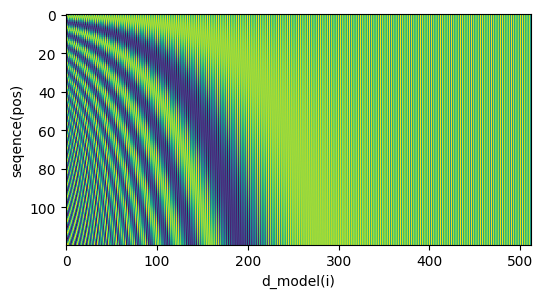

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

seq_length = 120
d_model = 512

PE = np.zeros((seq_length, d_model))
for pos in range(seq_length):
    for i in range(d_model//2):
        PE[pos, 2*i]   = np.sin( pos / (10000**(2*i/d_model)) )
        PE[pos, 2*i+1] = np.cos( pos / (10000**(2*i/d_model)) )

plt.figure(figsize=(6,3))
plt.xlabel('d_model(i)')
plt.ylabel('seqence(pos)')
plt.imshow(PE, aspect='auto');

## Positional Encoding

In [ ]:
def positional_encoding(seq_len, depth):
    positions = torch.arange(seq_len).reshape(-1, 1)
    exponent = torch.arange(depth//2)[torch.newaxis, :]*2/depth
    angle_rate = 1 / (10000**exponent)
    angle_rad = positions * angle_rate
    pos_encoding = torch.zeros((seq_len, depth))
    pos_encoding[:, ::2] = torch.sin(angle_rad)
    pos_encoding[:, 1::2] = torch.cos(angle_rad)
    return torch.FloatTensor(pos_encoding).unsqueeze(0)

In [ ]:
from torch import nn

class PositionalEmbedding(nn.Module):
    def __init__(self, seq_len, d_model, vocab_size, dropout, pad):
        super().__init__()
        self.scaler = d_model**0.5

        self.pos_encoding = positional_encoding(seq_len, d_model)
        self.embed = nn.Embedding(vocab_size, d_model, padding_idx=pad)
        self.dropout = nn.Dropout(dropout)

    def forward(self, inputs):
        out = self.embed(inputs) * self.scaler
        out = out + self.pos_encoding[:, :inputs.shape[1], :].to(inputs.device)
        out = self.dropout(out)
        return out

## 모델 구성

In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, enc_vocab_size, dec_vocab_size, enc_seq_len, dec_seq_len,
                 d_model=128, d_ff=256, n_heads=2, dropout=0.1,
                 n_layers=2, enc_pad=0, dec_pad=0):
        super().__init__()
        self.device = device
        self.enc_pad = enc_pad
        self.dec_pad = dec_pad

        self.enc_embed = PositionalEmbedding(enc_seq_len, d_model, enc_vocab_size, dropout, enc_pad)
        self.dec_embed = PositionalEmbedding(dec_seq_len, d_model, dec_vocab_size, dropout, dec_pad)
        self.transformer = nn.Transformer(d_model, n_heads, n_layers, n_layers,
                                          d_ff, dropout, batch_first=True)
        self.fc = nn.Linear(d_model, dec_vocab_size)

    def forward(self, encoder_input, decoder_input):
        enc_out = self.enc_embed(encoder_input)
        dec_out = self.dec_embed(decoder_input)

        enc_padding_mask = (encoder_input == self.enc_pad).to(self.device)
        dec_padding_mask = (decoder_input == self.dec_pad).to(self.device)
        dec_mask = self.transformer.generate_square_subsequent_mask(decoder_input.size(1)).bool().to(self.device)
        out = self.transformer(enc_out, dec_out,
                               src_key_padding_mask=enc_padding_mask,
                               tgt_key_padding_mask=dec_padding_mask,
                               memory_key_padding_mask=enc_padding_mask, tgt_mask=dec_mask)
        out = self.fc(out)
        return out

## 모델 생성

In [ ]:
import numpy as np
from torchinfo import summary

d_model=128
kor_pad = kor_tokenizer('<pad>')['input_ids'][0]
eng_pad = eng_tokenizer('<pad>')['input_ids'][0]

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = TransformerModel(len(kor_tokenizer), len(eng_tokenizer),  max_x_enc,  max_x_dec,
                    d_model=d_model, d_ff=128, n_heads=4, dropout=0.1, n_layers=2,
                    enc_pad=kor_pad, dec_pad=eng_pad).to(device)
summary(model)

Layer (type:depth-idx)                                                 Param #
TransformerModel                                                       --
├─PositionalEmbedding: 1-1                                             --
│    └─Embedding: 2-1                                                  1,034,112
│    └─Dropout: 2-2                                                    --
├─PositionalEmbedding: 1-2                                             --
│    └─Embedding: 2-3                                                  455,552
│    └─Dropout: 2-4                                                    --
├─Transformer: 1-3                                                     --
│    └─TransformerEncoder: 2-5                                         --
│    │    └─ModuleList: 3-1                                            199,168
│    │    └─LayerNorm: 3-2                                             256
│    └─TransformerDecoder: 2-6                                         --
│    │    └─Mod

 - LR 스케줄링

In [ ]:
# Warm up Scheduler
from torch import optim

class WarmupLRScheduler(optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, d_model,  warmup_steps, last_epoch=-1):
        def lambda_lr(step):
            arg1 = step**-0.5 if step > 0 else 0
            arg2 = step * (warmup_steps ** -1.5)
            return (d_model**-0.5) * min(arg1, arg2)
        super().__init__(optimizer, lambda_lr, last_epoch=last_epoch)

In [ ]:
warmup_steps=4000

loss_fn = nn.CrossEntropyLoss(ignore_index=eng_pad).to(device)
optimizer = optim.Adam(model.parameters(), lr=1, eps=1e-9, betas=(0.9, 0.98))
scheduler = WarmupLRScheduler(optimizer, d_model, warmup_steps)

In [ ]:
def fit(model, loader, loss_fn, opt, scheduler):
    loss=0
    n_sample = len(loader.dataset)
    model.train()
    for enc_x, dec_x, dec_y in loader:
        enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
        h = model(enc_x, dec_x)
        cost = loss_fn(h.view(-1, h.shape[2]).to(device), dec_y.view(-1))
        opt.zero_grad()
        cost.backward()
        opt.step()
        scheduler.step()
        loss += cost * enc_x.shape[0] / n_sample
    return loss

In [ ]:
# 약 2분
n_epochs = 20
history={'loss':[]}

# 약 2분 20초
for epoch in range(n_epochs):
    train_loss = fit(model, train_loader, loss_fn, optimizer, scheduler)
    history['loss'].append(train_loss)
    print(f'epoch={epoch}, loss:{train_loss}')

epoch=0, loss:8.207030296325684
epoch=1, loss:7.140152454376221
epoch=2, loss:6.2582221031188965
epoch=3, loss:5.625537872314453
epoch=4, loss:5.178297996520996
epoch=5, loss:4.899294376373291
epoch=6, loss:4.695160865783691
epoch=7, loss:4.503477096557617
epoch=8, loss:4.334723472595215
epoch=9, loss:4.1696600914001465
epoch=10, loss:4.016273498535156
epoch=11, loss:3.8688268661499023
epoch=12, loss:3.698518991470337
epoch=13, loss:3.5666587352752686
epoch=14, loss:3.413724660873413
epoch=15, loss:3.2650585174560547
epoch=16, loss:3.120502471923828
epoch=17, loss:2.9681596755981445
epoch=18, loss:2.8124215602874756
epoch=19, loss:2.6794044971466064


## 예측 값 생성 (추론)

In [ ]:
def predict(inputs, target_len=10):
    outputs = []
    start_token = eng_tokenizer('<bos>')['input_ids'][0]
    model.eval()
    with torch.no_grad():
        enc_out = model.enc_embed(inputs.to(device))
        enc_padding_mask = (inputs == model.enc_pad).to(inputs.device)
        memory = model.transformer.encoder(enc_out, src_key_padding_mask=enc_padding_mask)
        input_words = [start_token]*inputs.shape[0]
        decoder_input = torch.LongTensor(input_words).to(inputs.device).reshape(-1,1)
        c_token = ''
        for t in range(target_len-1):
            dec_mask = model.transformer.generate_square_subsequent_mask(decoder_input.size(1)).bool().to(inputs.device)
            decoder_input_emb = model.dec_embed(decoder_input)
            out = model.transformer.decoder(decoder_input_emb, memory, dec_mask)
            proba = model.fc(out[:, -1])
            decoder_output = proba.argmax(dim=1).reshape(-1, 1)
            outputs.append(decoder_output.item())
            decoder_input = torch.cat([decoder_input,  decoder_output], dim=1).long()
            c_token = eng_tokenizer.decode(outputs[-1])

            if c_token == '<eos>':
                break
    outputs = eng_tokenizer.decode(outputs[:-1])
    return outputs

In [ ]:
import re

def preprocessing(text, maxlen, tokenizer):
    text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣!? ]', '', text)
    text = torch.LongTensor(tokenizer(text)['input_ids'])
    text = custom_padding([text], maxlen=maxlen, padding='pre')
    return text

In [ ]:
np.random.seed(1)

for i in range(5):
    idx = np.random.randint(0, len(korean))
    inputs = korean[idx]
    data = preprocessing(inputs, max_x_enc, kor_tokenizer).reshape(1, -1)
    pred = predict(data.to(device))
    print(inputs, pred, sep=' -> ')

톰은 은퇴했어  -> tom is a great
그들이 떠났어  -> tom is a timid
공부하고 계십니까? -> tom is a great
톰은 택시를 잡았다  -> tom is a timid
물이 별로 없다  -> tom is a great


## 학습 Epoch 추가

## 데이터 로더 생성

In [ ]:
torch.manual_seed(777)
train_loader = DataLoader(dataset=train_set,
                          batch_size=32,
                          shuffle=True,
                          drop_last=False)

In [ ]:
d_model=128
spa_pad = kor_tokenizer('<pad>')['input_ids'][0]
eng_pad = eng_tokenizer('<pad>')['input_ids'][0]

model = TransformerModel(len(kor_tokenizer), len(eng_tokenizer),  max_x_enc,  max_x_dec,
                    d_model=d_model, d_ff=256, n_heads=4, dropout=0.1, n_layers=2,
                    enc_pad=spa_pad, dec_pad=eng_pad).to(device)

In [ ]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                                 Param #
TransformerModel                                                       --
├─PositionalEmbedding: 1-1                                             --
│    └─Embedding: 2-1                                                  1,034,112
│    └─Dropout: 2-2                                                    --
├─PositionalEmbedding: 1-2                                             --
│    └─Embedding: 2-3                                                  455,552
│    └─Dropout: 2-4                                                    --
├─Transformer: 1-3                                                     --
│    └─TransformerEncoder: 2-5                                         --
│    │    └─ModuleList: 3-1                                            264,960
│    │    └─LayerNorm: 3-2                                             256
│    └─TransformerDecoder: 2-6                                         --
│    │    └─Mod

In [ ]:
class WarmupLRScheduler(optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, d_model,  warmup_steps, last_epoch=-1):
        def lambda_lr(step):
            arg1 = step**-0.5 if step > 0 else 0
            arg2 = step * (warmup_steps ** -1.5)
            return (d_model**-0.5) * min(arg1, arg2)
        super().__init__(optimizer, lambda_lr, last_epoch=last_epoch)

In [ ]:
warmup_steps=4000

loss_fn = nn.CrossEntropyLoss(ignore_index=eng_pad).to(device)
optimizer = optim.Adam(model.parameters(), lr=1, eps=1e-9, betas=(0.9, 0.98))
scheduler = WarmupLRScheduler(optimizer, d_model, warmup_steps)

In [ ]:
def fit(model, loader, loss_fn, opt, scheduler):
    loss=0
    n_sample = len(loader.dataset)
    model.train()
    for enc_x, dec_x, dec_y in loader:
        enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
        h = model(enc_x, dec_x)
        cost = loss_fn(h.view(-1, h.shape[2]).to(device), dec_y.view(-1))
        opt.zero_grad()
        cost.backward()
        opt.step()
        scheduler.step()
        loss += cost * enc_x.shape[0] / n_sample
    return loss

In [ ]:
n_epochs = 50
history={'loss':[]}

for epoch in range(n_epochs):
    train_loss = fit(model, train_loader, loss_fn, optimizer, scheduler)
    history['loss'].append(train_loss)
    print(f'epoch={epoch}, loss:{train_loss}')

epoch=0, loss:7.964657783508301
epoch=1, loss:6.924945831298828
epoch=2, loss:6.1736578941345215
epoch=3, loss:5.566807270050049
epoch=4, loss:5.11842155456543
epoch=5, loss:4.825687885284424
epoch=6, loss:4.605031967163086
epoch=7, loss:4.415262699127197
epoch=8, loss:4.228780746459961
epoch=9, loss:4.054520606994629
epoch=10, loss:3.8945460319519043
epoch=11, loss:3.7241179943084717
epoch=12, loss:3.569612741470337
epoch=13, loss:3.421377420425415
epoch=14, loss:3.266695261001587
epoch=15, loss:3.117393970489502
epoch=16, loss:2.960907459259033
epoch=17, loss:2.818145751953125
epoch=18, loss:2.666743040084839
epoch=19, loss:2.519834280014038
epoch=20, loss:2.3682844638824463
epoch=21, loss:2.219212055206299
epoch=22, loss:2.0707080364227295
epoch=23, loss:1.9376554489135742
epoch=24, loss:1.8097889423370361
epoch=25, loss:1.6645708084106445
epoch=26, loss:1.525169014930725
epoch=27, loss:1.416797161102295
epoch=28, loss:1.2762439250946045
epoch=29, loss:1.1854673624038696
epoch=30, l

In [ ]:
np.random.seed(1)
for i in range(5):
    idx = np.random.randint(0, len(korean))
    inputs = korean[idx]
    data = preprocessing(inputs, max_x_enc, kor_tokenizer).reshape(1, -1)
    pred = predict(data.to(device))
    print(inputs, pred, sep=' -> ')

톰은 은퇴했어  -> tom got retired
그들이 떠났어  -> tom left
공부하고 계십니까? -> tom is smart
톰은 택시를 잡았다  -> tom took a cab
물이 별로 없다  -> tom is a muslim


# 허깅페이스 Transformers

In [ ]:
from transformers import pipeline

task = 'text-classification'
text = "I've been waiting for a HuggingFace course my whole life."


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)

text = "I've been waiting for a HuggingFace course my whole life."
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
label = model.config.id2label[predicted_class_id]
score = torch.softmax(logits, dim=1).squeeze()[predicted_class_id].item()
print(f'label:{label}, score:{score}')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

label:POSITIVE, score:0.9598048329353333


In [ ]:
# 파이플라인 모델 지정
task = 'text-classification'
text = "I've been waiting for a HuggingFace course my whole life."



Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

In [ ]:
# 여러 문장 분류
texts = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!"
]


[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [ ]:
# 한국어 감정 분류

task = 'text-classification'
model = 'matthewburke/korean_sentiment'
texts = [
    "그녀가 먼저 말을 걸어와서 나는 무척 기뻤다.",
    "듣기 싫어 죽겠네, 짜증나니까 그만 좀 조용히 해줄래"
]


config.json:   0%|          | 0.00/887 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/396k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/788k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.9496679902076721},
 {'label': 'LABEL_0', 'score': 0.9464049339294434}]

In [ ]:
# zero-shot classification

task = "zero-shot-classification"
sequences = "This is a course about the Transformers library"
candidate_labels=["education", "politics", "business"]


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445968627929688, 0.1119757816195488, 0.04342734441161156]}

In [ ]:
# 한국어 zero-shot classificaiton

task = "zero-shot-classification"
model_name = 'MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7'
sequences = "이 강의는 트랜스포머 라이브러리에 대한 것입니다."
candidate_labels=["교육", "정치", "사업"]



config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/467 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': '이 강의는 트랜스포머 라이브러리에 대한 것입니다.',
 'labels': ['교육', '정치', '사업'],
 'scores': [0.7452666759490967, 0.2351018637418747, 0.019631439819931984]}

In [ ]:
sequences = "이 소총의 유효사거리는 5km를 넘습니다."
candidate_labels=["예술", "정치", "군사"]


{'sequence': '이 소총의 유효사거리는 5km를 넘습니다.',
 'labels': ['군사', '정치', '예술'],
 'scores': [0.7075021266937256, 0.1599733829498291, 0.1325245350599289]}

In [ ]:
sequences = "선과 색의 조화가 탁월한 그 작품은 과거의 어느 작가의 그것과 닮아 있다."
candidate_labels=["예술", "정치", "군사"]



{'sequence': '선과 색의 조화가 탁월한 그 작품은 과거의 어느 작가의 그것과 닮아 있다.',
 'labels': ['예술', '군사', '정치'],
 'scores': [0.8367235064506531, 0.08361261337995529, 0.07966390252113342]}

In [ ]:
# Q & A
task = "question-answering"
question="Where do I work?"
context="My name is Sylvain and I work at Hugging Face in Brooklyn"


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.6949753165245056, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [ ]:
# 한국어 Q & A
task = "question-answering"
model='timpal0l/mdeberta-v3-base-squad2'
question="홍길동은 어디에 있지?"
context="홍길동씨는 잠실에 있는 숨겨진 국가정보원 빌딩에서 청소를 하며 살아 가고있다."



Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.7171633243560791, 'start': 5, 'end': 9, 'answer': ' 잠실에'}

In [ ]:
question="홍길동은 무얼하고 있지?"
context="홍길동씨는 잠실에 있는 숨겨진 국가정보원 빌딩에서 청소를 하며 살아 가고있다."


{'score': 0.588015079498291, 'start': 27, 'end': 31, 'answer': ' 청소를'}

In [ ]:
# GPT 텍스트 생성
task = "text-generation"
model='gpt2'
text_inputs = "In this course, we will teach you how to"


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to read a page for your target audience. So what we\'ll discuss is how to make your target audience understand to click the following link: "Click here to download a free eBook using this website " Click'}]

In [ ]:
# KoGPT 텍스트 생성
task = "text-generation"
model = "skt/kogpt2-base-v2"
text_inputs = "감기에 걸리지 않으려면"



Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


감기에 걸리지 않으려면 실내온도를 2°C 낮춰야 한다.
또한 실내 환기구를 통한 바이러스 유입의 위험이 높아지므로 야외활동을 자제하는 게 좋으며 물놀이 안전사고 예방을 위해 물놀이 후에는 반드시 비누와 물로 씻고 충분한 휴식과 충분한 휴식을 취해야


In [ ]:
# Bert 텍스트 분류
from transformers import pipeline

task = "text-classification"
texts = ['아름다운 이에요.', '아 짜증나 듣기 싫어 죽겠네.']
model_name = 'Woonn/klue_bert_base'



config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/523 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.9505610466003418},
 {'label': 'LABEL_0', 'score': 0.9900859594345093}]